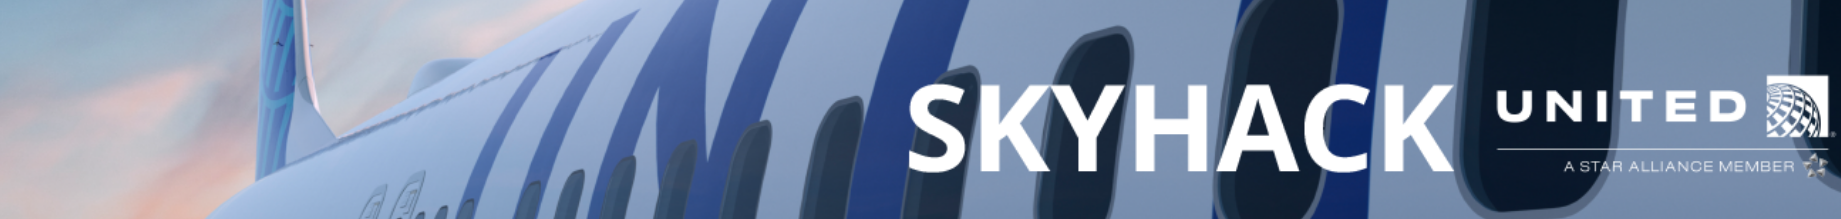

# Analysing `Inflight Service Pre-Order` Data & `Inflight Service Inventory` Data

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

## 1. PRE-ORDER DATA

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)

In [68]:
pre_order_data = pd.read_csv("Datasets/Inflight Service_Pre order data.csv")
pre_order_data.head() 

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty,Unnamed: 13,Unnamed: 14
0,1423,INX,DEX,B3XX1H,UA,09-01-2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers, and orzo","Za'atar chicken with spinach, roasted peppers, and orzo",Y,1,NaN,NaN
1,1620,IAX,CUX,BFXXJC,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted red pepper sauce,Y,2,NaN,NaN
2,1852,ORX,PDX,DPXX2H,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted red pepper sauce,Y,1,NaN,NaN
3,548,IAX,SFX,ELXX8H,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2,NaN,NaN
4,1155,IAX,CUX,NCXX4S,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sauce and berries,Y,2,NaN,NaN


In [69]:
pre_order_data.shape  

(212039, 15)

In [70]:
pre_order_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   flight_number            212039 non-null  int64  
 1   departure_station_code   212039 non-null  object 
 2   arrival_station_code     212039 non-null  object 
 3   record_locator           212039 non-null  object 
 4   carrier_code             212039 non-null  object 
 5   scheduled_departure_dtl  212039 non-null  object 
 6   cabin_code               212039 non-null  object 
 7   meal_group               191728 non-null  object 
 8   meal_category            191728 non-null  object 
 9   meal_short_description   212039 non-null  object 
 10  meal_description         137062 non-null  object 
 11  is_entree                191728 non-null  object 
 12  pre_order_qty            212039 non-null  int64  
 13  Unnamed: 13              0 non-null       float64
 14  Unna

In [71]:
pre_order_data.drop(columns = ['Unnamed: 13', 'Unnamed: 14'], inplace = True)

In [72]:
pre_order_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            212039 non-null  int64 
 1   departure_station_code   212039 non-null  object
 2   arrival_station_code     212039 non-null  object
 3   record_locator           212039 non-null  object
 4   carrier_code             212039 non-null  object
 5   scheduled_departure_dtl  212039 non-null  object
 6   cabin_code               212039 non-null  object
 7   meal_group               191728 non-null  object
 8   meal_category            191728 non-null  object
 9   meal_short_description   212039 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                191728 non-null  object
 12  pre_order_qty            212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [73]:
## changing dtypes

pre_order_data['scheduled_departure_dtl'] = pre_order_data['scheduled_departure_dtl'].astype('datetime64[ns]')

In [74]:
# pre_order_data['scheduled_departure_dtl']
pre_order_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   flight_number            212039 non-null  int64         
 1   departure_station_code   212039 non-null  object        
 2   arrival_station_code     212039 non-null  object        
 3   record_locator           212039 non-null  object        
 4   carrier_code             212039 non-null  object        
 5   scheduled_departure_dtl  212039 non-null  datetime64[ns]
 6   cabin_code               212039 non-null  object        
 7   meal_group               191728 non-null  object        
 8   meal_category            191728 non-null  object        
 9   meal_short_description   212039 non-null  object        
 10  meal_description         137062 non-null  object        
 11  is_entree                191728 non-null  object        
 12  pre_order_qty   

## 1.1 EDA 

-----------------------------------------------------
-----------------------------------------------------

### 1.1.1 Best `meal_group` from the data 

In [75]:
best_meal_group = pre_order_data.groupby(['meal_group'])['pre_order_qty'].sum().reset_index().sort_values(by = 'pre_order_qty', ascending = False)
best_meal_group

,meal_group,pre_order_qty
3,ENTREES HOT,199586
6,UNITED CATERER OWNED 88-3F,39646
4,LIQUOR,4808
0,ALCOHOL BEVERAGES,3056
2,ENTREES COLD,2790
1,BEER,2383
5,SANDWICHES,74


In [76]:
best_meal_group_category = pre_order_data.groupby(['meal_group', 'meal_category'])['pre_order_qty'].sum().reset_index().sort_values(by = ['meal_group','pre_order_qty'], ascending = [True, False])
best_meal_group_category

,meal_group,meal_category,pre_order_qty
0,ALCOHOL BEVERAGES,GENERIC INT WINE A,3056
1,BEER,BEER,2383
2,ENTREES COLD,CHEESE,2737
3,ENTREES COLD,VARIETY,53
5,ENTREES HOT,BREAKFAST,69690
10,ENTREES HOT,POULTRY,54255
13,ENTREES HOT,VEGETARIAN,37625
4,ENTREES HOT,BEEF/VEAL,36035
8,ENTREES HOT,PASTA,1100
11,ENTREES HOT,SEAFOOD,589


--------------------------------------------------------------
-------------------------------------------------------------
**Conclusion** 

1. Out of all `meal_group` , ENTREES HOT has been pre-ordered mostly, and out of all ENTREES HOT category, travellers prefer to have `BREAKFAST`, `POULTRY`, `VEGETARIAN` and `BEEF/VEAL` mostly, and top of it, they prefer `CHEESE` from `ENTREES COLD` category. 
2. From rest of all groups, `UNITED CATERER OWNED 88-3F`, `SNACKS` are mostly preordered by travellers. 
3. And from rest, travellers often go for `BEER` and `LIQUOR` and `WINE`S as well for may be with their meal. 
----------------------------------------------------------
----------------------------------------------------------

**TARGET FOR UA**
1. Sales of the mostly liked foods shouldn't go down, 
2. As well as the less preferred foods intake should also increase.
3. Run some Ads or give some discounts to the travellers so that they will be convinvced to go for `BEER` and `LIQUOR` and `WINE` more, with their regular snacks and breakfast.

In [166]:
best_meal_group_entree_category = pre_order_data.groupby(['meal_group', 'meal_category', 'is_entree'])['pre_order_qty'].sum().reset_index().sort_values(by = ['meal_group','pre_order_qty'], ascending = [True, False])
best_meal_group_entree_category

,meal_group,meal_category,is_entree,pre_order_qty
0,ALCOHOL BEVERAGES,GENERIC INT WINE A,N,3056
1,BEER,BEER,N,2383
2,ENTREES COLD,CHEESE,Y,2737
3,ENTREES COLD,VARIETY,Y,53
5,ENTREES HOT,BREAKFAST,Y,69690
10,ENTREES HOT,POULTRY,Y,54255
13,ENTREES HOT,VEGETARIAN,Y,37625
4,ENTREES HOT,BEEF/VEAL,Y,36035
8,ENTREES HOT,PASTA,Y,1100
11,ENTREES HOT,SEAFOOD,Y,589


In [78]:
## what is the intake ratio for is_entree (meal food preference)

is_entree_or_not = pre_order_data.groupby(['is_entree'])['pre_order_qty'].sum().reset_index().sort_values(by = 'pre_order_qty', ascending = False)
is_entree_or_not

,is_entree,pre_order_qty
1,Y,202450
0,N,49893



--------------------------------------------------------------------------------------
----------------------------------------------------------------------------------
**Travellers often go for `main course` rather than liquids or non-meals items except, `SNACKS`**

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

## 2. INVENTORY DATA (Business / First Class )

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

In [79]:
## loading and reading the data

inventory_data = pd.read_csv("Datasets/Inflight Service_Inventory data.csv")
inventory_data.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,09-01-2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,09-01-2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,09-02-2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,09-04-2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,09-08-2022,60549,Vegetarian chili and polenta cake,V,1,0


In [80]:
# inventory_data['entree_code'].unique()

In [81]:
## changing datetime columns

inventory_data['scheduled_departure_dtl'] = inventory_data['scheduled_departure_dtl'].astype('datetime64[ns]')
inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   flight_number            61267 non-null  int64         
 1   departure_station_code   61267 non-null  object        
 2   arrival_station_code     61267 non-null  object        
 3   scheduled_departure_dtl  61267 non-null  datetime64[ns]
 4   entree_product_id        61267 non-null  int64         
 5   entree_description       61267 non-null  object        
 6   entree_code              61267 non-null  object        
 7   planned_entree_count     61267 non-null  int64         
 8   consumed_entree_count    61267 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 4.2+ MB


## 2.1 EDA 

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

In [82]:
# for every entree_code, finding the sum of planned_entree_count and consumed_entree_count

sum_planned_consumed_entree = inventory_data.groupby(['entree_code'])[['planned_entree_count', 'consumed_entree_count']].sum().reset_index().sort_values(by = ['planned_entree_count', 'consumed_entree_count'], ascending = [False, False])

# percent consumed 
sum_planned_consumed_entree['perct_consumed'] = sum_planned_consumed_entree['consumed_entree_count']/sum_planned_consumed_entree['planned_entree_count'] * 100
sum_planned_consumed_entree

,entree_code,planned_entree_count,consumed_entree_count,perct_consumed
3,C,158522,71897,45.354588
26,V,102904,39828,38.704035
15,O,72806,37169,51.052111
30,WF,55022,23037,41.868707
1,B,23105,6975,30.188271
7,E,11714,3430,29.281202
16,O2,5561,4406,79.230354
12,FT,5475,1475,26.940639
17,OM,4867,1376,28.272036
18,P,3431,1070,31.186243


In [91]:
# for every entree_code, and entree_description, finding the sum of planned_entree_count and consumed_entree_count

sum_planned_consumed_entree_desc = inventory_data.groupby(['entree_description'])[['planned_entree_count', 'consumed_entree_count']].sum().reset_index().sort_values(by = ['planned_entree_count', 'consumed_entree_count'], ascending = [False, False])

# percent consumed 
sum_planned_consumed_entree_desc['perct_consumption'] = sum_planned_consumed_entree_desc['consumed_entree_count']/sum_planned_consumed_entree_desc['planned_entree_count'] * 100
sum_planned_consumed_entree_desc[:20]

,entree_description,planned_entree_count,consumed_entree_count,perct_consumption
100,Zatar chicken,137864,63307,45.919892
56,Impossible Meatball Bowl,87523,35155,40.166585
79,Scrambled eggs,60331,31439,52.110855
6,Belgium waffle,55022,23037,41.868707
9,Brioche cheeseburger,18693,4311,23.062109
95,Tomato and kale baked egg,9426,2494,26.458731
26,Classic selection cheese tray,8937,3811,42.642945
16,Chicken breast entree,7821,4152,53.087840
99,Vegetarian entree,5790,2699,46.614853
92,Tapas,5561,4406,79.230354


In [92]:
# sum_planned_consumed_entree_desc[:50]['perct_consumption']

In [93]:
# sum_planned_consumed_entree_desc['perct_consumption'].mean()

In [94]:
## out of top 50 dishes finding those dishes where the perct_consumption ratio is less than mean of overall data

sum_planned_consumed_entree_desc[:50][sum_planned_consumed_entree_desc[:50]['perct_consumption'] <= sum_planned_consumed_entree_desc['perct_consumption'].mean()]

,entree_description,planned_entree_count,consumed_entree_count,perct_consumption
9,Brioche cheeseburger,18693,4311,23.062109
95,Tomato and kale baked egg,9426,2494,26.458731
98,Vegetarian chili and polenta cake,4516,848,18.777679
64,Mediterranean Falafel Bowl,4054,735,18.130242
55,Horchata steel cut oatmeal,3893,812,20.857950
46,Gingerbread French Toast,2991,597,19.959880
11,Butternut squash ravioli,1161,298,25.667528
37,"ENT, HAWAIIAN QUINOA SALAD WITH GRILLED CHICKEN, UE, PLACE ON TRAY SETUP",996,0,0.000000
65,Monterey jack and red pepper egg white bites,856,204,23.831776
36,"ENT, GUAVA EGG NOODLE SALAD WITH TOFU, ROASTED HEIRLOOM TOMATO, GREEN ONION, FURIKAKE",663,0,0.000000


**TARGET FOR UA**

1. Why this 14 items are not sold though they were asked to prepare in the flights.
2. `HAWAIIAN QUINOA SALAD WITH GRILLED CHICKEN`, was ordered for almost 1000 times but none of the times it was consumed by travellers, that's really concerning.
3. Find out the travellers reason not to consume the food, though they have ordered from the comments, if available.
4. `UA` to increase the consumption rate by atleast `10-20%`

In [168]:
## out of top 50 dishes finding those dishes where the perct_consumption ratio is more than mean of overall data

dishes_with_good_perct_consumption = sum_planned_consumed_entree_desc[:50][sum_planned_consumed_entree_desc[:50]['perct_consumption'] >= sum_planned_consumed_entree_desc['perct_consumption'].mean()]

## cosnidering only those dishes where planned_entree_count > 1000 and perct_consumption is also good
dishes_with_good_perct_consumption = dishes_with_good_perct_consumption[dishes_with_good_perct_consumption['planned_entree_count'] >= 1000].sort_values(by = 'perct_consumption', ascending = False)[:10] 

In [170]:
## checking the final data


dishes_with_good_perct_consumption

,entree_description,planned_entree_count,consumed_entree_count,perct_consumption
92,Tapas,5561,4406,79.230354
93,Teriyaki chicken,1525,1185,77.704918
31,"ENT, BREAKFAST LIGHT REFRESHMENT",1765,1161,65.779037
81,Seared beef short rib,2201,1211,55.020445
16,Chicken breast entree,7821,4152,53.087840
79,Scrambled eggs,60331,31439,52.110855
99,Vegetarian entree,5790,2699,46.614853
100,Zatar chicken,137864,63307,45.919892
72,Protein egg entree,1658,746,44.993969
26,Classic selection cheese tray,8937,3811,42.642945


**Conclusion** 

1. `Tapas` is one of the food that is ordered for quite some large no of times and consumed almost `80%` of the times
2. `Teriyaki chicken` is also on the list of good consumption rate.
3. `BREAKFAST LIGHT REFRESHMENT` is also preferred by travellers in Business and First Class
4. `Scrambled Eggs` and `Chicken`s are preferred by travellers. 
5. `Vegetarian Entree` is also preferred by the travellers.

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

## 3. Finding best meal description 

--------------------------------------------------------------------

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
### 3.1 Best meal description for both `Business/First Class` as well as for the `Pre-Order`(`Economy` class)

--------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

**Approach** -->

1. Merge both `Inventory Data` and `pre_order_data` on the basis of `primary keys`
2. and most of times `entree_description` of `inventory_data` and `meal_short_description` of `pre_order_data` matched
3. Finally group by necessary columns and finding the top 10 meals that are preordered as well consumed mostly.

In [135]:
## merging

inventory_preorder_data = pd.merge(inventory_data, pre_order_data,
                      left_on=['flight_number', 'departure_station_code', 'arrival_station_code',
                                'scheduled_departure_dtl', 'entree_description'],
                      right_on=['flight_number', 'departure_station_code', 'arrival_station_code',
                               'scheduled_departure_dtl', 'meal_short_description'],
                      how = 'inner')

inventory_preorder_data.shape

(56910, 18)

In [136]:
# inventory_data.columns

### 3.1.1 Performing EDA 

* to make sure our data is correctly merged

In [137]:
inventory_preorder_data.isnull().sum()

flight_number                 0
departure_station_code        0
arrival_station_code          0
scheduled_departure_dtl       0
entree_product_id             0
entree_description            0
entree_code                   0
planned_entree_count          0
consumed_entree_count         0
record_locator                0
carrier_code                  0
cabin_code                    0
meal_group                  255
meal_category               255
meal_short_description        0
meal_description           4002
is_entree                   255
pre_order_qty                 0
dtype: int64

In [138]:
## dropping all those rows where meal_description columns is null

inventory_preorder_data.dropna(subset = ['meal_description'], inplace=True)

In [139]:
inventory_preorder_data.shape

(52908, 18)

In [140]:
inventory_preorder_data.isnull().sum() 

flight_number              0
departure_station_code     0
arrival_station_code       0
scheduled_departure_dtl    0
entree_product_id          0
entree_description         0
entree_code                0
planned_entree_count       0
consumed_entree_count      0
record_locator             0
carrier_code               0
cabin_code                 0
meal_group                 0
meal_category              0
meal_short_description     0
meal_description           0
is_entree                  0
pre_order_qty              0
dtype: int64

### 3.1.2 Finding the best meal and its consumption ratio and no of times it was ordered

In [146]:
## considering only those columns where the entree_description and meal_description are same

entree_meal_des_data = inventory_preorder_data[inventory_preorder_data['entree_description'] == inventory_preorder_data['meal_description']]

In [147]:
entree_meal_des_data.shape

(5632, 18)

In [148]:
entree_meal_des_data.columns

Index(['flight_number', 'departure_station_code', 'arrival_station_code',
       'scheduled_departure_dtl', 'entree_product_id', 'entree_description',
       'entree_code', 'planned_entree_count', 'consumed_entree_count',
       'record_locator', 'carrier_code', 'cabin_code', 'meal_group',
       'meal_category', 'meal_short_description', 'meal_description',
       'is_entree', 'pre_order_qty'],
      dtype='object')

In [165]:
## all meals that were common to both business, First Class and Economy Class

business_economy_meal_data = entree_meal_des_data.groupby(['meal_group', 'meal_category','entree_description', 'is_entree'])[['planned_entree_count', 'consumed_entree_count',
                                                    'pre_order_qty']].sum().reset_index()

## creating new columns consumption rate
business_economy_meal_data['consumption_rate'] = business_economy_meal_data['consumed_entree_count']/business_economy_meal_data['planned_entree_count'] * 100.0

## sorting the values from low to high
business_economy_meal_data = business_economy_meal_data.sort_values(by = ['meal_group','pre_order_qty', 'consumption_rate'], ascending=[True, False, False])

## reordering columns
columns = ['meal_group','meal_category', 'entree_description', 'is_entree', 'planned_entree_count',
           'consumed_entree_count', 'consumption_rate', 'pre_order_qty']

# final result showcase
business_economy_meal_data = business_economy_meal_data[columns] 

business_economy_meal_data

,meal_group,meal_category,entree_description,is_entree,planned_entree_count,consumed_entree_count,consumption_rate,pre_order_qty
0,ENTREES COLD,CHEESE,Classic selection cheese tray,Y,9157,3367,36.769684,896
4,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,Y,7426,1402,18.879612,4154
3,ENTREES HOT,POULTRY,Chicken breast entree,Y,13661,7966,58.311983,1919
5,ENTREES HOT,VEGETARIAN,Vegetarian entree,Y,2352,1165,49.532313,409
1,ENTREES HOT,BREAKFAST,Protein egg entree,Y,1393,643,46.159368,158
2,ENTREES HOT,BREAKFAST,Savory breakfast entree,Y,740,353,47.702703,134
6,UNITED CATERER OWNED 88-3F,SNACKS,Tapas,N,2515,2037,80.994036,156


### Conclusion ::

1. `ENTREES HOT` meal_groups are favourite of `Economy` class as well as `Business Class/First Class`
2. For both the Business/First and Economy Class the `BREAKFAST`, `VEGETARIAN` and `POULTRY` items are always preferrable.
3. The only non entree food item preferred by both class travellers is `TAPAS` under the `UNITED CATERER OWNED 88-3F` Snacks.
4. Though `Mediterranean Falafel Bowl`s consumption is quite low, only **18.88%** for `Business Class` but its preorder quantity is quite high for `Economy` class. 


**TARGET FOR UA**
1. What's wrong with `ENTREES HOT`, `VEGETARIAN`  category in case of Business Class.
2. What's wrong with other meal_group that appeared while individual analysis.

## 4. Saving to `csv` file

In [173]:
## saving the data of economy class passengers

best_meal_group_entree_category.to_csv("Datasets/economy_best_meal_group_entree_category.csv")

In [171]:
## saving the data of business class passengers

dishes_with_good_perct_consumption.to_csv("Datasets/business_class_dishes_with_good_perct_consumption.csv")

In [172]:
## saving the data of business and economy both class passengers

business_economy_meal_data.to_csv("Datasets/business_economy_meal_data.csv")